In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import stan_jupyter as stan
import pandas as pd

In [2]:
df = pd.read_csv("sim_data.csv")

## Speed test: standardized, logged, normal

## Poisson vs. negative binomial vs. normal

## Using matrices for covariates 

## Standardizing by group

In [3]:
def standardize(df, cols, group_vars):
    group = group_vars
    for col in cols:
        df[f"{col}_std"] = (df[col] - df.groupby(group)[col].transform("mean")) / df.groupby(group)[col].transform("std")

In [4]:
standardize(df, ["quantity", "price", "competitor_price"], ["sku", "account"])

In [5]:
with open("stan_code/standardize.stan", "r") as f:
    model_code = f.read()
    
model_data = {
    "N":len(df),
    "N_SKUS":df.sku.nunique(),
    "N_ACCOUNTS":df.account.nunique(),
    "sku":df.sku.tolist(),
    "account":df.account.tolist(),
    "quantity":df.quantity.tolist(),
    "price":df.price_std.tolist(),
    "competitor_price":df.competitor_price_std.tolist(),
}

In [6]:
%%capture
posterior = stan.build(model_code, model_data)

In [109]:
%%time
#%%capture
fit = posterior.sample(num_chains=4, num_samples=100) # Normal model

Sampling:   0%
Sampling:   0% (1/4400)
Sampling:   0% (2/4400)
Sampling:   0% (3/4400)
Sampling:   0% (4/4400)
Sampling:   2% (103/4400)
Sampling:   5% (202/4400)
Sampling:   7% (301/4400)
Sampling:   9% (400/4400)
Sampling:  11% (500/4400)
Sampling:  14% (600/4400)
Sampling:  16% (700/4400)
Sampling:  18% (800/4400)
Sampling:  20% (900/4400)
Sampling:  23% (1000/4400)
Sampling:  25% (1100/4400)
Sampling:  27% (1200/4400)
Sampling:  30% (1300/4400)
Sampling:  32% (1400/4400)
Sampling:  34% (1500/4400)
Sampling:  36% (1600/4400)
Sampling:  39% (1700/4400)
Sampling:  41% (1800/4400)
Sampling:  43% (1900/4400)
Sampling:  45% (2000/4400)
Sampling:  48% (2100/4400)
Sampling:  50% (2200/4400)
Sampling:  52% (2300/4400)
Sampling:  55% (2400/4400)
Sampling:  57% (2500/4400)
Sampling:  59% (2600/4400)
Sampling:  61% (2700/4400)
Sampling:  64% (2800/4400)
Sampling:  66% (2900/4400)
Sampling:  68% (3000/4400)
Sampling:  70% (3100/4400)
Sampling:  73% (3200/4400)
Sampling:  75% (3300/4400)
Samplin

CPU times: user 8.27 s, sys: 980 ms, total: 9.25 s
Wall time: 10min


In [7]:
%%time
#%%capture
fit = posterior.sample(num_chains=4, num_samples=1000) # Standardized

Sampling:   0%
Sampling:   0% (1/8000)
Sampling:   0% (2/8000)
Sampling:   0% (3/8000)
Sampling:   0% (4/8000)
Sampling:   1% (103/8000)
Sampling:   3% (202/8000)
Sampling:   4% (301/8000)
Sampling:   5% (401/8000)
Sampling:   6% (500/8000)
Sampling:   8% (600/8000)
Sampling:   9% (700/8000)
Sampling:  10% (800/8000)
Sampling:  11% (900/8000)
Sampling:  12% (1000/8000)
Sampling:  14% (1100/8000)
Sampling:  15% (1200/8000)
Sampling:  16% (1300/8000)
Sampling:  18% (1400/8000)
Sampling:  19% (1500/8000)
Sampling:  20% (1600/8000)
Sampling:  21% (1700/8000)
Sampling:  22% (1800/8000)
Sampling:  24% (1900/8000)
Sampling:  25% (2000/8000)
Sampling:  26% (2100/8000)
Sampling:  28% (2200/8000)
Sampling:  29% (2300/8000)
Sampling:  30% (2400/8000)
Sampling:  31% (2500/8000)
Sampling:  32% (2600/8000)
Sampling:  34% (2700/8000)
Sampling:  35% (2800/8000)
Sampling:  36% (2900/8000)
Sampling:  38% (3000/8000)
Sampling:  39% (3100/8000)
Sampling:  40% (3200/8000)
Sampling:  41% (3300/8000)
Samplin

CPU times: user 43.7 s, sys: 4.03 s, total: 47.8 s
Wall time: 3min 19s


In [8]:
az.summary(fit)

/Users/jikaasik/miniconda/lib/python3.9/site-packages/arviz/stats/diagnostics.py:561: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
alpha             36.561  1.072  34.576   38.703      0.037    0.026   
beta              -3.188  0.679  -4.547   -1.875      0.020    0.014   
gamma              1.850  0.111   1.642    2.057      0.002    0.001   
sigma              5.530  0.078   5.388    5.682      0.002    0.001   
sku_intercept[0]  -0.574  0.880  -2.247    1.129      0.027    0.023   
...                  ...    ...     ...      ...        ...      ...   
gap[2496]          4.493  3.341   0.002   10.322      0.056    0.039   
gap[2497]          6.252  4.395   0.002   14.080      0.070    0.050   
gap[2498]         12.291  5.332   1.885   21.978      0.084    0.060   
gap[2499]          9.184  5.148   0.176   17.822      0.081    0.058   
mae                6.226  0.093   6.050    6.399      0.001    0.001   

                  ess_bulk  ess_tail  r_hat  
alpha                894.0     732.0   1.00  
beta                1253.0     852.0   1.00  
gamma               3203.0    2131.0   1.00  
sigma               2567.0    2030.0   1.00  
sku_intercept[0]    1160.0    1054.0   1.01  
...                    ...       ...    ...  
gap[2496]           3578.0    3708.0   1.00  
gap[2497]           3936.0    3958.0   1.00  
gap[2498]           4093.0    3993.0   1.00  
gap[2499]           4029.0    3927.0   1.00  
mae                 3891.0    3743.0   1.00  

[10029 rows x 9 columns]

<AxesSubplot:>

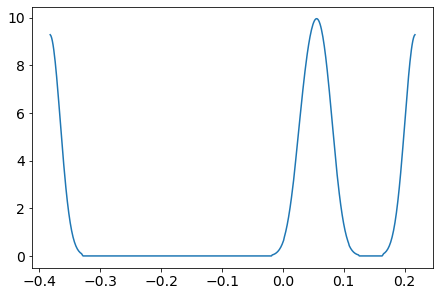

In [24]:
az.plot_kde([n.mean() for n in fit['account_slope']])

<AxesSubplot:>

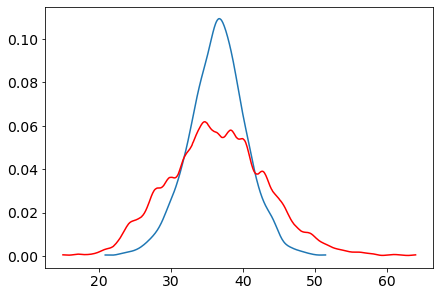

In [20]:
az.plot_kde([n.mean() for n in fit['y_pred']])
az.plot_kde([n.mean() for n in fit['y']], plot_kwargs={"color":'r'})